In [1]:
#本章需导入的模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
import warnings
warnings.filterwarnings(action = 'ignore')
from sklearn.metrics import confusion_matrix,f1_score,roc_curve, auc, precision_recall_curve,accuracy_score
from sklearn.model_selection import train_test_split,KFold,LeaveOneOut,LeavePOut # 数据集划分方法
from sklearn.model_selection import cross_val_score,cross_validate # 计算交叉验证下的测试误差
from sklearn import preprocessing
import sklearn.linear_model as LM
from sklearn import neighbors

(0.455, 1.01)

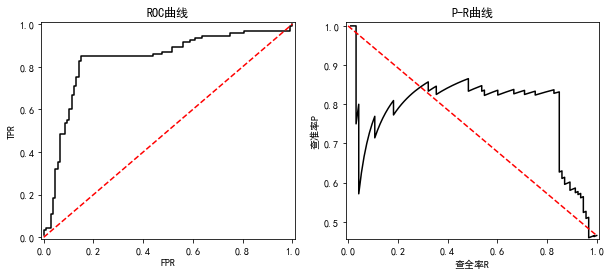

In [2]:
data = pd.read_csv('类别和概率.csv')
label=data['label']
prob=data['prob']
pos = np.sum(label == 1)
neg = np.sum(label == 0)
prob_sort = np.sort(prob)[::-1]
index = np.argsort(prob)[::-1]
label_sort = label[index]

Pre = []
Rec = []
tpr=[]
fpr=[]
for i, item in enumerate(prob_sort):
    Rec.append(np.sum((label_sort[:(i+1)] == 1)) /pos)
    Pre.append(np.sum((label_sort[:(i+1)] == 1))/(i+1))
    tpr.append(np.sum((label_sort[:(i+1)] == 1))/pos)
    fpr.append(np.sum((label_sort[:(i+1)] == 0)) /neg)

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,4))
axes[0].plot(fpr,tpr,'k')
axes[0].set_title('ROC曲线')
axes[0].set_xlabel('FPR')
axes[0].set_ylabel('TPR')
axes[0].plot([0, 1], [0, 1], 'r--')
axes[0].set_xlim([-0.01, 1.01])
axes[0].set_ylim([-0.01, 1.01])
axes[1].plot(Rec,Pre,'k')
axes[1].set_title('P-R曲线')
axes[1].set_xlabel('查全率R')
axes[1].set_ylabel('查准率P')
axes[1].plot([0,1],[1,pos/(pos+neg)], 'r--')
axes[1].set_xlim([-0.01, 1.01])
axes[1].set_ylim([pos/(pos+neg)-0.01, 1.01])

说明：
1、这里给出绘制ROC曲线和P-R曲线的示例。数据来自名为“类别和概率.csv”的文本文件，包括两列数据。第1列为模型预测为1类的概率值，第2列为实际标签（0或1）。
2、首先，计算实际标签为1和0类的样本量(pos和neg)；然后，将数据按概率值降序重新排列。
3、利用for循环计算绘图所需数据，FPR,TPR,查全率R和查准率P。循环中的i为索引，item为prob_sort的具体值（预测概率）。item值的重要应用是确定合理的概率阈值，应为TPR/FPR最大处的item值。这里采用enumerate() 函数，用于给出一个可遍历数据对象(如列表等）的索引和对应的数据。